In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [143]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


### Seperate Input and Output Data

In [144]:
x = df['Resume']
y = df['Category']

In [145]:
## Exploratory Data Analysis

len(set(y))

25

<Axes: xlabel='count', ylabel='Category'>

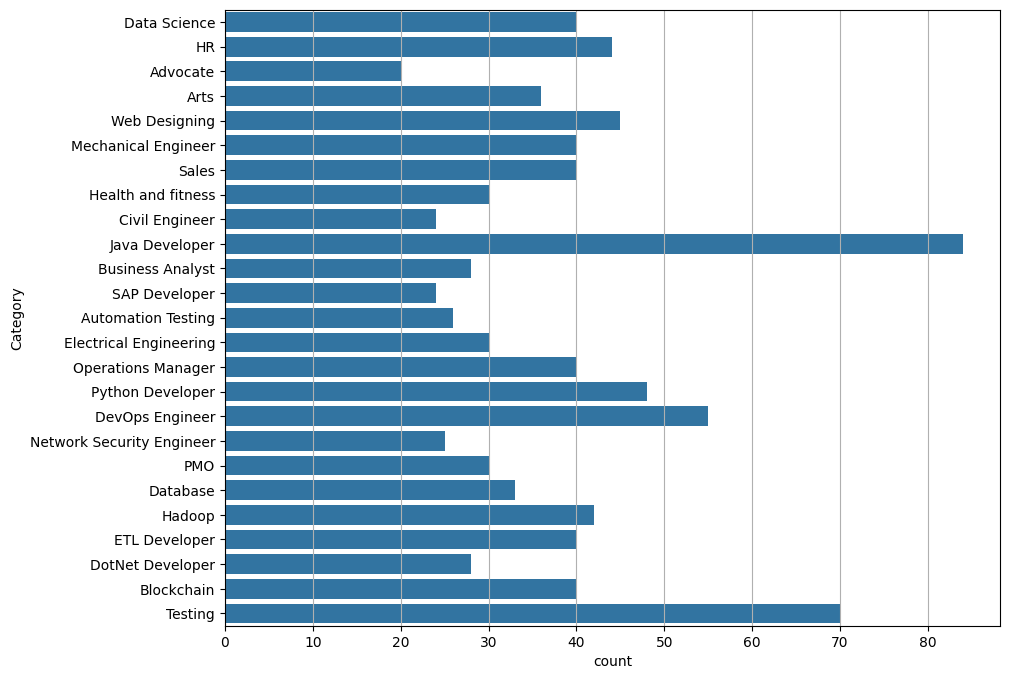

In [146]:
plt.figure(figsize=(10,8))
plt.grid()
sns.countplot(y=y)

In [147]:
y.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

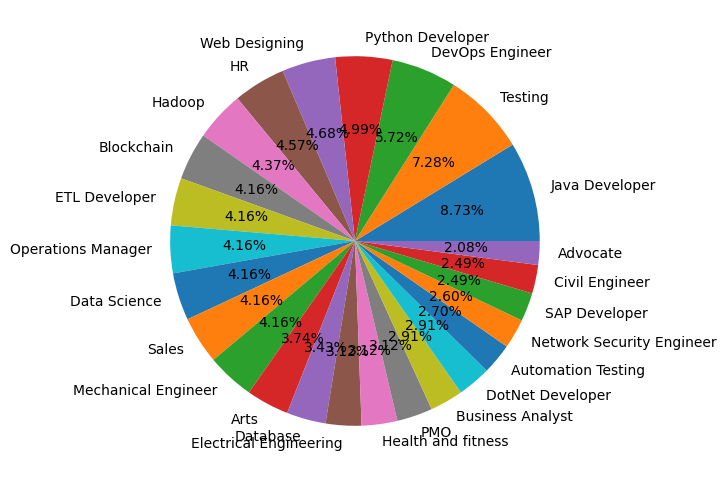

In [148]:
plt.figure(figsize=(8,6))
plt.pie(y.value_counts() , labels=y.value_counts().index , autopct='%2.2f%%');

In [149]:
java = x [y == 'Java Developer']

In [150]:
java

319    Education Details \r\nAugust 2010 to May 2017 ...
320    Technical Skills (Trained / Project Acquired S...
321    TECHNICAL SKILLS Skills: Java, SQL, PL/SQL, C,...
322    TECHNICAL STRENGTHS Computer Language Java/J2E...
323    Education Details \r\nJanuary 2013 Master of E...
                             ...                        
398    Computer Skills: Languages And Script: JSP, Se...
399    Education Details \r\nJanuary 2016 B.E Informa...
400    TECHNICAL SKILLS Programming Languages: Java (...
401    SKILLS: - 1) Team leading 2) Self-motivated 3)...
402    Skills â¢ Language: Java â¢ Operating System...
Name: Resume, Length: 84, dtype: object

In [151]:
from nltk.tokenize import word_tokenize

In [152]:
java = ' '.join(java)

In [153]:
java = word_tokenize(java)

In [154]:
from wordcloud import WordCloud

In [155]:
wc = WordCloud(max_words=100).generate(" ".join(java))

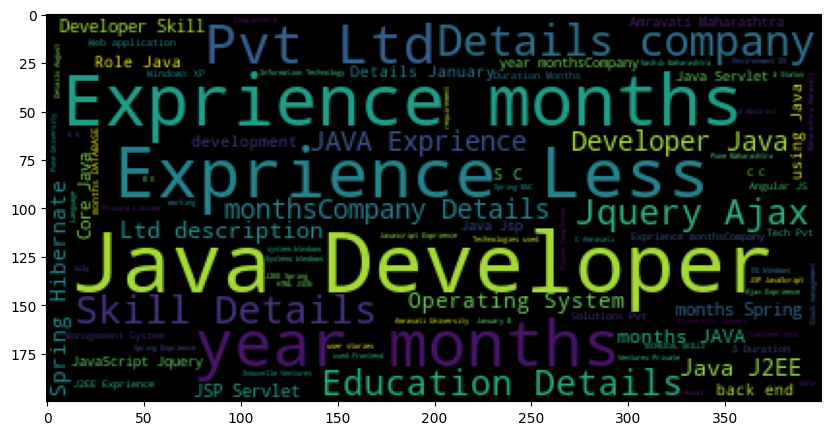

In [156]:
plt.figure(figsize=(10,8))
plt.imshow(wc)

### Data Cleaning

In [157]:
import re , string
def CleanResume(resumeText):
    resumeText = re.sub("http\S+\s*" , " " , resumeText) #remove URLs
    resumeText = re.sub("RT|cc" , " " , resumeText) #remove RT and cc
    resumeText = re.sub("#\S+" , " " , resumeText) #remove hastags
    resumeText = re.sub("@\S+" , " " , resumeText) #remove mentions
    resumeText = re.sub("[%s]" % re.escape(string.punctuation), " " , resumeText) #remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]' , r" " , resumeText) #remove non-ASCII characters
    resumeText = re.sub("\s+" , " " , resumeText) #remove extra whitespace
    return resumeText


In [158]:
#x.apply(CleanText)

In [159]:
CleanResume(x[123])

' Operating Systems Windows XP Vista 07Education Details January 2018 M F A painting Nagpur Maharashtra Nagpur University January 2016 B F A Painting Nagpur Maharashtra Nagpur University January 2012 Diploma Art Maharashtra State Board January 2010 H S C Maharashtra State Board January 2008 S S C Maharashtra State Board Fine arts lecturer Skill Details Ms Cit Exprience 96 monthsCompany Details company Shubhankan Fine Arts College indore description I m doing a job as a Lecturer in Shubhankan Fine Arts College Indore from Nov 2018 I m an Artist completed ATD BFA and MFA in painting I m searching for a job in my faculty in my area and comfort place To improve my knowledge and experience in this field company description I have a experience of classes of painting rangoli drawing summer classes etc Health Physical Disability Orthopedically '

In [160]:
cleaned = x.apply(CleanResume)

In [161]:
cleaned.shape

(962,)

In [162]:
cleaned

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [163]:
### TF*IDF Vectorizer

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [165]:
tfv = TfidfVectorizer(stop_words='english')

In [166]:
x_new = tfv.fit_transform(cleaned)

In [167]:
x_new

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [168]:
tfv.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

#### Cross Validation

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train , x_test , y_train , y_test = train_test_split(x_new , y , random_state=0)

In [171]:
x_train.shape

(721, 7351)

In [172]:
y_train.shape

(721,)

#### Build the model

In [173]:
from sklearn.neighbors import NearestCentroid

In [174]:
nm = NearestCentroid()

In [175]:
nm.fit(x_train , y_train)

NearestCentroid()

#### Performance Evaluation

In [176]:
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay

y_pred = nm.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9875518672199171


In [177]:
print(classification_report(y_test ,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       0.83      0.83      0.83         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00        10
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.85      0.92        13
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       0.91      1.00      0.95        10
                       HR       1.00      1.00      1.00         8
                   Hadoop       1.00      1.00      1.00     

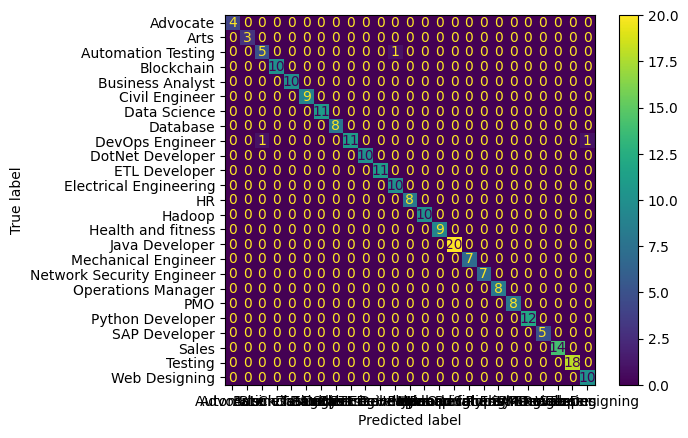

In [178]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [252]:
### Sample Resume Prediction

In [246]:
f = open("Sample_resume.txt")

In [247]:
data = f.read()

In [248]:
#data

In [249]:
data = CleanResume(data)

In [250]:
data_new = tfv.transform([data])

In [257]:
nm.predict(data_new)[0]

'Data Science'